In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
data = {
    'Sample ID': ['S1', 'S2', 'S3', 'S4', 'S5'],
    'Quartz (%)': [45, 50, 55, 60, 65],
    'Feldspar (%)': [30, 25, 20, 15, 10],
    'Mica (%)': [25, 25, 25, 25, 25]
}

In [16]:
df = pd.DataFrame(data)

In [17]:
average_composition = df.mean(numeric_only=True)

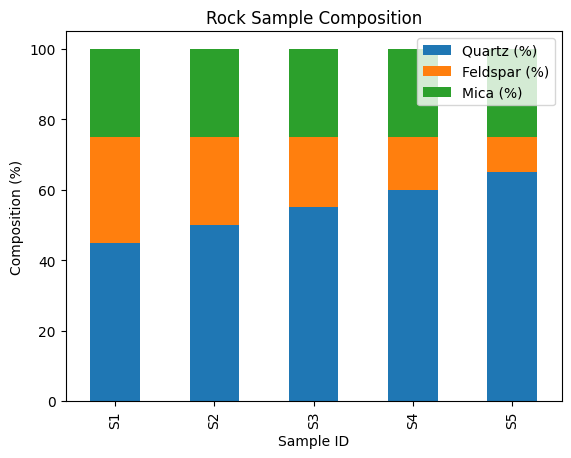

Average Composition:
Quartz (%)      55.0
Feldspar (%)    20.0
Mica (%)        25.0
dtype: float64


In [18]:
df.plot(x='Sample ID', kind='bar', stacked=True)
plt.title('Rock Sample Composition')
plt.xlabel('Sample ID')
plt.ylabel('Composition (%)')
plt.legend(loc='upper right')
plt.show()
print("Average Composition:")
print(average_composition)

**Make It More Professional**

In [40]:
import pandas as pd
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [41]:
data = {
    'Quartz (%)': [45, 50, 55, 60, 65],
    'Feldspar (%)': [30, 25, 20, 15, 10],
    'Mica (%)': [25, 25, 25, 25, 25],
    'Rock Type': ['Granite', 'Basalt', 'Granite', 'Basalt', 'Granite']
}

In [42]:
df = pd.DataFrame(data)

In [43]:
df['Rock Type'] = df['Rock Type'].astype('category').cat.codes

In [44]:
X = df.drop('Rock Type', axis=1)
y = df['Rock Type']

strat_split = StratifiedShuffleSplit(n_splits=1, test_size=0.4, random_state=42)
for train_index, test_index in strat_split.split(X, y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

In [45]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [46]:
y_pred = model.predict(X_test)

In [47]:
print(classification_report(y_test, y_pred, zero_division=0))

feature_importances = pd.Series(model.feature_importances_, index=X.columns)
print("Feature Importances:\n", feature_importances)


              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1

    accuracy                           0.50         2
   macro avg       0.25      0.50      0.33         2
weighted avg       0.25      0.50      0.33         2

Feature Importances:
 Quartz (%)      0.466418
Feldspar (%)    0.533582
Mica (%)        0.000000
dtype: float64


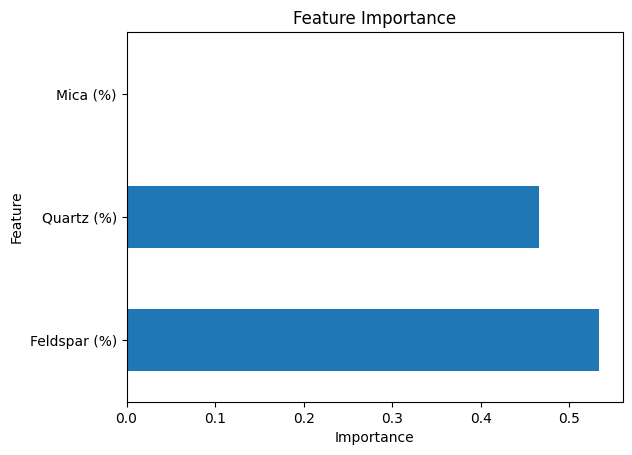

In [48]:
feature_importances.nlargest(3).plot(kind='barh')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()